<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 1.3 - Linear Regression

### Thomas Derr

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from  matplotlib import pyplot

#### Begin helper function
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## End helper function
# Source - https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

## QR decomposition


QR decomposition breaks down some $n\times m$ matrix $A$ into two matrices $Q$ and $R$ which abide by the following equation.

$A = QR$


It is simmilar to $UL$ decomposition in that it creates an upper-triangular matrix, however, instead of breaking $M$ into a product of upper and lower triangular matrices, it makes $Q$ and $R$ an orthogonal matrix and an upper triangular matrix respectively.



In [ ]:
A = np.random.rand(5,5)
Q, R = np.linalg.qr(A)
display_side_by_side(pd.DataFrame(A),pd.DataFrame(Q),pd.DataFrame(R), titles=['A','Q', 'R'])

,0,1,2,3,4
0,0.094315,0.622895,0.264661,0.343944,0.440746
1,0.223525,0.332799,0.030414,0.675009,0.473818
2,0.660020,0.373614,0.488603,0.856432,0.744453
3,0.084478,0.415945,0.549055,0.492664,0.138167
4,0.742512,0.561759,0.404076,0.167414,0.519955
,0,1,2,3,4
0,-0.091913,-0.800277,0.248377,-0.117421,-0.525004
1,-0.217833,-0.227926,0.503556,0.645972,0.479323
2,-0.643212,0.215838,-0.322645,0.461131,-0.472176
3,-0.082326,-0.509604,-0.738522,0.048306,0.431019


## Least Squares

Least squares is a method of solving the system of

$A\textbf{x} = b$

given a matrix $A$ and a vector $b$


To do this we want to solve for

$\min \limits_{x\in \mathbb{R}^m} ||Ax-b||$



Therefore, we want to mimimize

$\sum \limits_{i=1}^{n}(\hat{y}_i - b_i)^2$ for $\hat{y}_i  = \sum \limits_{j=1}^{m}x_ja_{i,j}$

by finding the optimal combination of $A$'s columns.

We can do this by using $QR$ decomposition to take advantage of being able to use back substitution on $R$ as it is upper triangular

$Rx^* = Q^Tb$

Below we will show solving for least squares with a python package, as well as using $QR$ decomposition

In [ ]:
# solving with numpy library
A = np.random.rand(5,5)
b = np.random.rand(5,1)
xlst = np.linalg.lstsq(A,b, rcond=None)[0]

# solving with QR decomposition
Q, R = np.linalg.qr(A)
Qt = np.matrix.transpose(Q)
xQR = np.linalg.solve(R, (Qt.dot(b)))


display_side_by_side(pd.DataFrame(xlst),pd.DataFrame(xQR), titles=['linalg.lstsq','QR Decomposition'])

,0
0,-1.367222
1,0.012076
2,0.110411
3,1.061150
4,2.292640
,0
0,-1.367222
1,0.012076
2,0.110411
3,1.061150


## Linear Regression

Linear regression is a method to minimize the following function

$\sum \limits_{i=1}^{n}(\hat{y}_i - y_i)^2$

for $\hat{y}_i  = \beta_0 \sum \limits_{j=1}^{d}\beta_jx_{ij}$

This gives us an optimal linear function to fit our data.

If we format the coefficients $\beta_0...\beta_d$ as a column vector, we can frame the problem as a least squares problem

Of the form

$y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\end{pmatrix}, A = \begin{pmatrix}  1 & x_1^T \\ 1 & x_2^T \\ \vdots & \vdots \\ 1 & x^T_n\end{pmatrix}, \text{ and } \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_d \end{pmatrix}$

as we are trying to find


$\min \limits_{\beta} ||y-A\beta||$


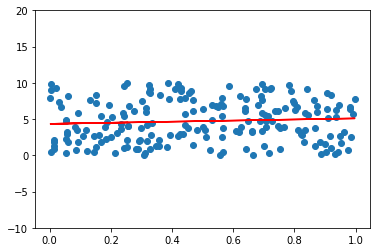

In [ ]:
#Y
y = np.random.uniform(0,10, size=(200,))

#A
A = np.random.rand(200,1)
ones = np.ones((200,1))
df = np.concatenate([ones, A], axis=1)

#Perform regression
reg = LinearRegression().fit(df,y)

#Visual
reg.fit(A, y)
pred=reg.predict(A)
pyplot.scatter(A, y)
pyplot.plot(A,pred, color='red')
pyplot.ylim([-10, 20])
pyplot.show()